In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

In [55]:
def check_class_distribution(df, column_name):
    """
    Prints and returns the class distribution of a specified column in the DataFrame.
    """
    class_counts = df[column_name].value_counts()
    print(f"Class distribution:\n{class_counts}")
    return class_counts

def balance_classes(df, column_name, random_state=42):
    """
    Balances the dataset by downsampling the majority class to the size of the minority class.
    Returns the balanced DataFrame.
    """
    # Identify minority and majority classes dynamically
    class_counts = df[column_name].value_counts()
    minority_class = class_counts.idxmin()
    majority_class = class_counts.idxmax()

    # Split the dataset
    df_minority = df[df[column_name] == minority_class]
    df_majority = df[df[column_name] == majority_class]

    # Downsample the majority class
    minority_size = len(df_minority)
    df_majority_downsampled = df_majority.sample(n=minority_size, random_state=random_state)

    # Combine and shuffle
    df_balanced = pd.concat([df_majority_downsampled, df_minority])
    return df_balanced.sample(frac=1, random_state=random_state).reset_index(drop=True)

def plot_class_distribution(before_counts, after_counts, title="Class Distribution Before and After Balancing"):
    """
    Plots a bar chart to compare class distributions before and after balancing.
    """
    labels = before_counts.index
    x = range(len(labels))  # X-axis values for classes

    # Plotting
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.bar(x, before_counts, width=0.4, label='Before Balancing', color='skyblue', align='center')
    ax.bar([i + 0.4 for i in x], after_counts, width=0.4, label='After Balancing', color='orange', align='center')

    # Add labels and titles
    ax.set_xlabel('Classes')
    ax.set_ylabel('Counts')
    ax.set_title(title)
    ax.set_xticks([i + 0.2 for i in x])
    ax.set_xticklabels(labels)
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

def subset_dataframe(df, columns):
    """
    Subsets the DataFrame based on the provided list of column names.

    Parameters:
        df (pd.DataFrame): The original DataFrame.
        columns (list): List of column names to select.

    Returns:
        pd.DataFrame: A new DataFrame containing only the specified columns.
    """
    try:
        # Subset the DataFrame
        df_subset = df[columns]
        return df_subset
    except KeyError as e:
        print(f"Error: {e}")
        print("Some of the specified columns are not present in the DataFrame.")
        return None

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd

def evaluate_model(X, y, model=None, scaling = False):
    """
    Logs evaluation metrics, confusion matrix, classification report, and feature importances (if applicable).

    Parameters:
        y_test (array-like): True labels for the test set.
        y_pred (array-like): Predicted labels by the model.
        X (pd.DataFrame, optional): Feature set used for training (needed for feature importances).
        model (sklearn model, optional): Trained model (must have `feature_importances_` attribute for feature importance logging).

    Returns:
        None: Prints metrics and feature importances.
    """
    # Calculate evaluation metrics
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    if(scaling):
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
        X_test_scaled = scaler.transform(X_test)        # Transform testing data
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Display evaluation metrics
    print("Model Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Confusion Matrix and Classification Report
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Feature Importances (if applicable)
    if model is not None and hasattr(model, 'feature_importances_') and X is not None:
        feature_importances = pd.DataFrame({
            'Feature': X.columns,
            'Importance': model.feature_importances_
        }).sort_values(by='Importance', ascending=False)
        print("\nFeature Importances:")
        print(feature_importances)

    if('randomforestclassifier' in str(model).lower()):
        # Plot feature importances
        plt.figure(figsize=(8, 6))
        plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
        plt.xlabel("Importance Score")
        plt.ylabel("Features")
        plt.title("Feature Importances in Random Forest")
        plt.show()



In [56]:
df = pd.read_json("../data/adjacent_change_processed/output_file.json")

In [57]:
df = df.dropna()
label_mapping = {'bot': 1, 'human': 0}
df['user_class'] = df['user_class'].map(label_mapping)
df.head()

,content_syntactic_blocstring,action_blocstring,changes_list_content_syntactic_,changes_list_action,src,userId,user_class,tweet_count,change_content_syntactic,change_action,change_change_dynamic_score,highest_change_in_content_syntactic,lowest_change_in_content_syntactic,standard_deviation_of_content_syntactic,highest_change_in_action,lowest_change_in_action,standard_deviation_of_action,diversity_action,diversity_content_syntactic,diversity_change_dynamics_score
0,(mmmmmmmmqt)(mmmmmmmmqt)(mmmmmmmmqt)(mmmmmmmmq...,rprp⚀pr□prrprrrprpprprprprprpprprprp□rprprprrr...,"[0.683772233983162, 0.6413313282702231, 0.7963...","{'content_syntactic': [0.683772233983162, 0.64...",astroturf,146048090,1,274,0.452173,0.403716,0.860073,1.0,0.000000,0.337325,1.0,0.000000e+00,0.333447,0.653102,0.652532,0.450906
1,(mmmmmmmqt)(mmmmmmmqt)(mmmmmmmqt)(mmmmmmmqt)(m...,r□pr□rr□rp⚀r⚀TTTTTTT□r⚀p⚀π□p|⚀rr⚀rr⚀rr□r⚀r|⚀p⚀...,"[0.060087460014451005, 0.0, 0.0049628097900100...","{'content_syntactic': [0.060087460014451005, 0...",astroturf,797927149856403456,1,275,0.481471,0.491328,0.586060,1.0,0.000000,0.432201,1.0,2.220446e-16,0.290351,0.707387,0.693840,0.151417
2,(mmt)(mmt)(qt)(qt)(qt)(mqt)(qt)(t)(qt)(qt)(Em)...,r□r⚀r⚀rr□rrr□r□r⚀rrr⚀r|⚁rrrrr□rrrrrr□rpprrrp□r...,"[0.405057793599891, 0.47776703213290606, 0.013...","{'content_syntactic': [0.405057793599891, 0.47...",astroturf,1046169889138868224,1,277,0.431741,0.369664,1.066061,1.0,0.000000,0.435529,1.0,2.220446e-16,0.249736,0.676182,0.644029,0.297367
3,(mmt)(mmmmmmqt)(mmmmmmmmmqt)(mmt)(mmt)(qt)(mmm...,prrpp□rrrrrrrrrrrrrr□rr□rrr□rrprrrrrrr□prrrrrr...,"[0.628809264805127, 0.7846125524146781, 1.0, 1...","{'content_syntactic': [0.628809264805127, 0.78...",astroturf,1085010463128195072,1,244,0.183893,0.425183,1.532266,1.0,0.000000,0.365115,1.0,4.622382e-02,0.349031,0.698081,0.620676,0.211830
4,(mmmmmmmqt)|(Em)|(t)(mmqt)(mt)(mmt)|(qt)(HUqt)...,p|⚁p|⚀p□p□p□p|⚁rrrrrrrrpr□prrprr□rrrprrprrrprp...,"[1.0, 1.0, 0.742674882267167, 0.92647853779061...","{'content_syntactic': [1.0, 1.0, 0.74267488226...",astroturf,1613166488,1,245,0.812726,0.547337,0.791417,1.0,0.373736,0.207269,1.0,2.220446e-16,0.289094,0.680286,0.766445,0.627025


Class distribution before balancing:
Class distribution:
user_class
1    44432
0    39215
Name: count, dtype: int64
Class distribution after balancing:
Class distribution:
user_class
1    39215
0    39215
Name: count, dtype: int64


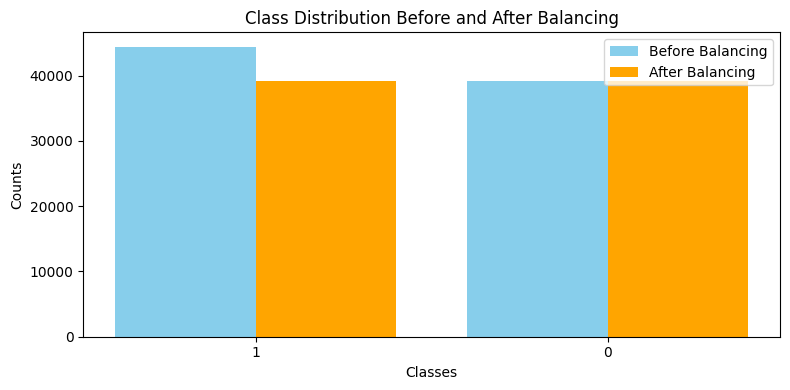

In [58]:
# Check initial distribution
print("Class distribution before balancing:")
before_counts = check_class_distribution(df, 'user_class')

# Balance the dataset
df_balanced = balance_classes(df, 'user_class', random_state=42)

# Check new distribution
print("Class distribution after balancing:")
after_counts = check_class_distribution(df_balanced, 'user_class')

# Plot the distributions
plot_class_distribution(before_counts, after_counts)


Model Evaluation Metrics:
Accuracy: 0.8315
Precision: 0.8316
Recall: 0.8315
F1 Score: 0.8315

Confusion Matrix:
[[ 9708  2095]
 [ 2133 11159]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     11803
           1       0.84      0.84      0.84     13292

    accuracy                           0.83     25095
   macro avg       0.83      0.83      0.83     25095
weighted avg       0.83      0.83      0.83     25095


Feature Importances:
                                    Feature  Importance
5   standard_deviation_of_content_syntactic    0.146084
2               change_change_dynamic_score    0.130538
9                          diversity_action    0.105360
1                             change_action    0.104840
10              diversity_content_syntactic    0.103905
0                  change_content_syntactic    0.101878
11          diversity_change_dynamics_score    0.100529
8              standard_deviation_of

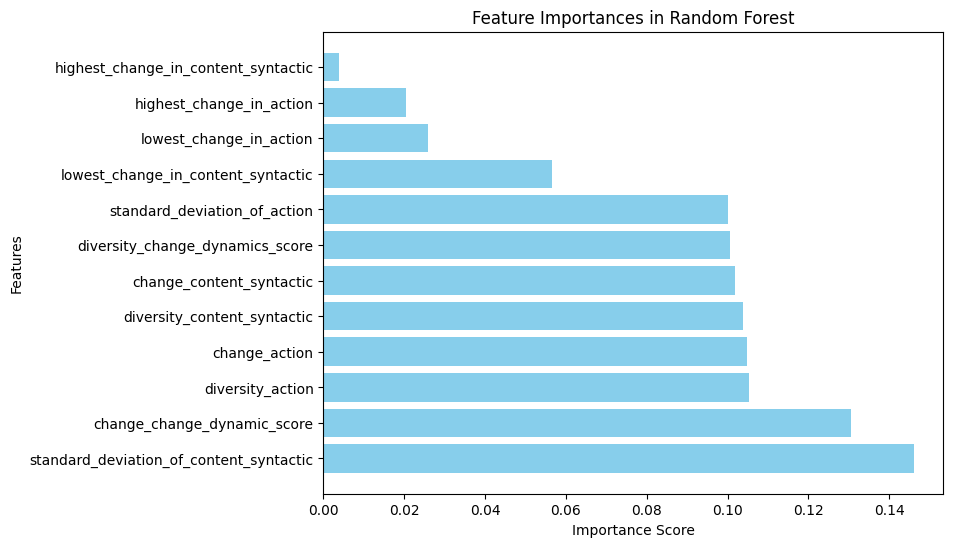

In [61]:
# Example usage
columns_to_select = [
    "user_class", 
    "change_content_syntactic", 
    "change_action", 
    "change_change_dynamic_score", 
    "highest_change_in_content_syntactic", 
    "lowest_change_in_content_syntactic", 
    "standard_deviation_of_content_syntactic", 
    "highest_change_in_action", 
    "lowest_change_in_action", 
    "standard_deviation_of_action",
    'diversity_action', 
    'diversity_content_syntactic',
    'diversity_change_dynamics_score'
]

df_subset_for_rf = subset_dataframe(df, columns_to_select)
# print(df_subset_for_rf.head())

X = df_subset_for_rf.drop(columns=['user_class'])      # Drop the target column
labels = df_subset_for_rf['user_class']                # Target column

rf = RandomForestClassifier(n_estimators=100, random_state=42)

evaluate_model(X, labels, model=rf, scaling = True)



In [64]:
# Example usage
columns_to_select = [
    "user_class", 
    "change_change_dynamic_score", 
    "diversity_change_dynamics_score"
]

df_subset = subset_dataframe(df, columns_to_select)
# print(df_subset.head())

X = df_subset_for_rf.drop(columns=['user_class'])      # Drop the target column
labels = df_subset_for_rf['user_class']                # Target column

log_reg_poly = LogisticRegression(max_iter=1000)

evaluate_model(X, labels, model=log_reg_poly)

Model Evaluation Metrics:
Accuracy: 0.8002
Precision: 0.8009
Recall: 0.8002
F1 Score: 0.8003

Confusion Matrix:
[[ 9498  2305]
 [ 2709 10583]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79     11803
           1       0.82      0.80      0.81     13292

    accuracy                           0.80     25095
   macro avg       0.80      0.80      0.80     25095
weighted avg       0.80      0.80      0.80     25095



In [ ]:
# Example usage
columns_to_select = [
    "user_class", 
    "change_change_dynamic_score", 
    "diversity_change_dynamics_score"
]

df_subset = subset_dataframe(df, columns_to_select)
# print(df_subset.head())

X = df_subset_for_rf.drop(columns=['user_class'])      # Drop the target column
labels = df_subset_for_rf['user_class']                # Target column

poly = PolynomialFeatures(degree=2)  

evaluate_model(X, labels, model=poly)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Generate polynomial features
poly = PolynomialFeatures(degree=2)  # Adjust degree as needed
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Fit logistic regression with polynomial features
log_reg_poly = LogisticRegression(max_iter=1000)
log_reg_poly.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = log_reg_poly.predict(X_test_poly)

LogisticRegression(max_iter=1000)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='weighted')        # Use 'weighted' for multiclass
f1 = f1_score(y_test, y_pred, average='weighted')                # Use 'weighted' for multiclass

In [21]:
# Display evaluation metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation Metrics:
Accuracy: 0.7343
Precision: 0.7356
Recall: 0.7343
F1 Score: 0.7339

Confusion Matrix:
[[5742 2527]
 [1889 6464]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.69      0.72      8269
           1       0.72      0.77      0.75      8353

    accuracy                           0.73     16622
   macro avg       0.74      0.73      0.73     16622
weighted avg       0.74      0.73      0.73     16622



In [70]:
# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence warning occurs


In [71]:
# Train the model
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [72]:
# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)


In [73]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='weighted')        # Use 'weighted' for multiclass
f1 = f1_score(y_test, y_pred, average='weighted')                # Use 'weighted' for multiclass

In [74]:
# Display evaluation metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix and Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation Metrics:
Accuracy: 0.7198
Precision: 0.7220
Recall: 0.7198
F1 Score: 0.7190

Confusion Matrix:
[[5512 2757]
 [1901 6452]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.67      0.70      8269
           1       0.70      0.77      0.73      8353

    accuracy                           0.72     16622
   macro avg       0.72      0.72      0.72     16622
weighted avg       0.72      0.72      0.72     16622



In [75]:

# Extract coefficients and feature names
coefficients = log_reg.coef_  # Coefficients for each class (multiclass case)
feature_names = X_train_scaled.columns if isinstance(X_train_scaled, pd.DataFrame) else [f"Feature {i}" for i in range(X_train_scaled.shape[1])]

print(feature_names, coefficients)

Index(['change_change_dynamic_score', 'diversity_change_dynamics_score'], dtype='object') [[-0.64599459 -1.4017256 ]]


/sciclone/data10/iahewababarand/.venv/lib64/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


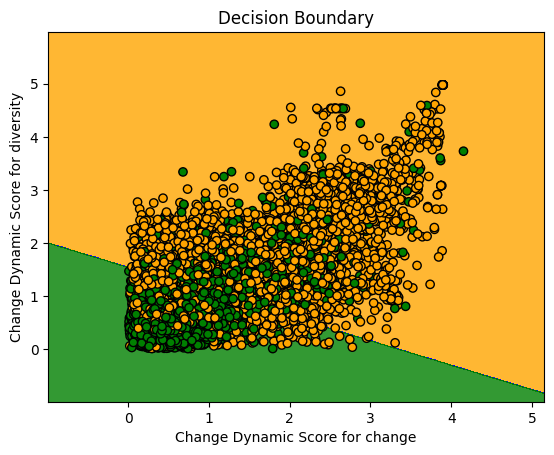

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y):
    # Ensure input is a NumPy array
    if hasattr(X, "iloc"):  # Check if it's a DataFrame
        X = X.iloc[:, :2].values
    else:
        X = X[:, :2]  # Assume it's already a NumPy array

    # Define grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict for grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('orange', 'blue', 'green')))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=ListedColormap(('orange', 'blue', 'green')))
    plt.xlabel('Change Dynamic Score for change')
    plt.ylabel('Change Dynamic Score for diversity')
    plt.title('Decision Boundary')
    plt.show()

# Ensure your dataset is in the right shape for 2D plotting
plot_decision_boundary(log_reg, X_test_scaled, y_test)

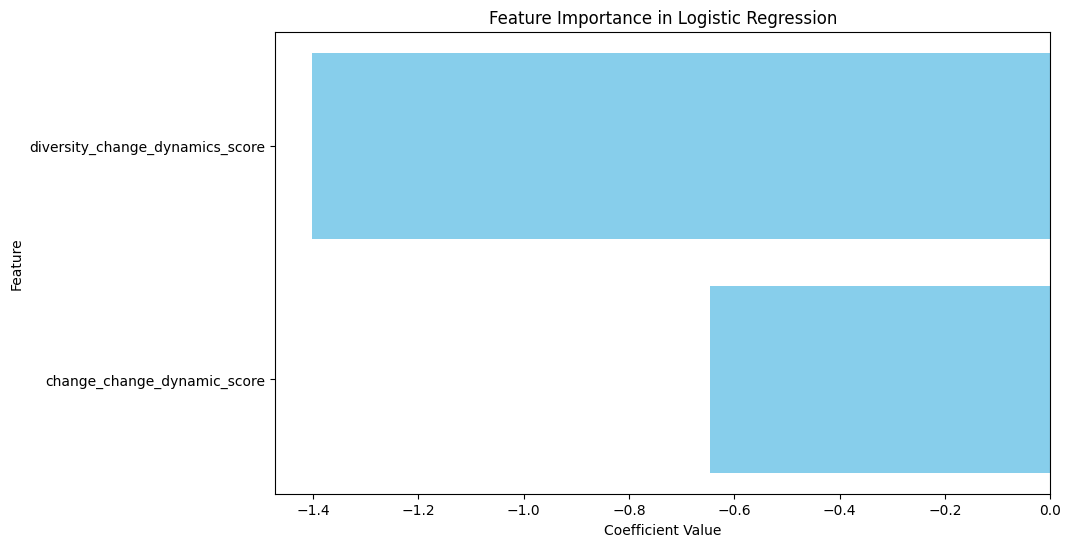

                           Feature  Coefficient  Odds Ratio  Importance
1  diversity_change_dynamics_score    -1.401726    0.246172    1.401726
0      change_change_dynamic_score    -0.645995    0.524141    0.645995


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature names (useful if working with DataFrames)
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train.shape[1])]

# Extract coefficients
coefficients = log_reg.coef_[0]  # For binary classification
# For multiclass, you'd iterate over each row in log_reg.coef_

# Create a DataFrame for easy visualization
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds Ratio': np.exp(coefficients)  # Convert to odds ratios
})

# Sort by absolute importance
coef_df['Importance'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Importance', ascending=False)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()  # To display the largest coefficients on top
plt.show()

# Display coefficients and odds ratios
print(coef_df)


/sciclone/data10/iahewababarand/.venv/lib64/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


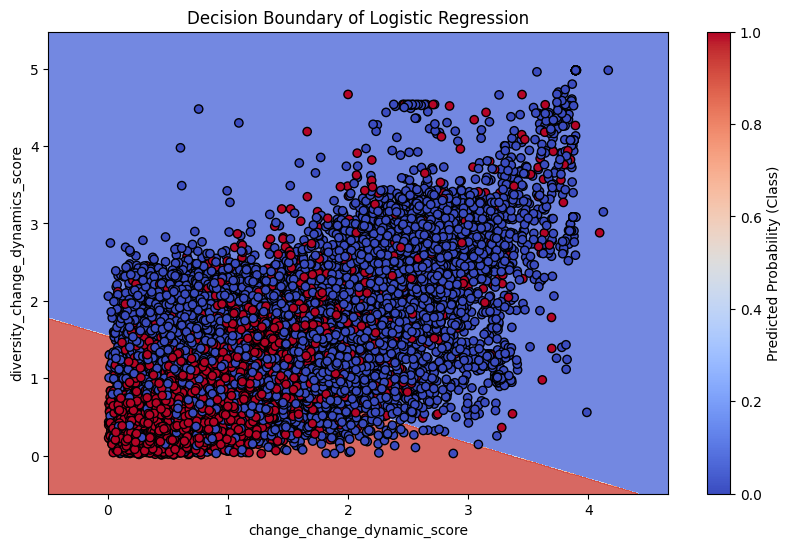

In [78]:
# Create a mesh grid for plotting
x_min, x_max = X_train.iloc[:, 0].min() - 0.5, X_train.iloc[:, 0].max() + 0.5
y_min, y_max = X_train.iloc[:, 1].min() - 0.5, X_train.iloc[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Predict probabilities for each point in the grid
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# Scatter plot of the training data
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title("Decision Boundary of Logistic Regression")
plt.xlabel("change_change_dynamic_score")
plt.ylabel("diversity_change_dynamics_score")
plt.colorbar(label="Predicted Probability (Class)")
plt.show()

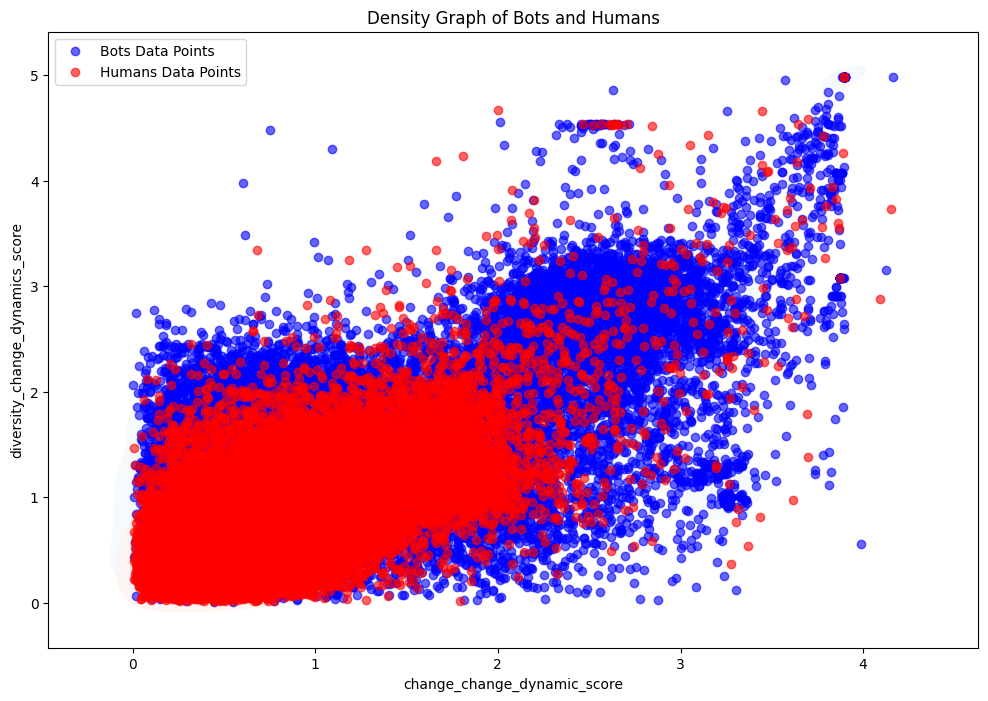

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate the data by class
bots = df_subset[df_subset['user_class'] == 'bot']
humans = df_subset[df_subset['user_class'] == 'human']

# Create the plot
plt.figure(figsize=(12, 8))

# Density plots
sns.kdeplot(x=bots['change_change_dynamic_score'], 
            y=bots['diversity_change_dynamics_score'], 
            cmap="Blues", fill=True, alpha=0.5, label='Bots')
sns.kdeplot(x=humans['change_change_dynamic_score'], 
            y=humans['diversity_change_dynamics_score'], 
            cmap="Reds", fill=True, alpha=0.5, label='Humans')

# Scatter points
plt.scatter(bots['change_change_dynamic_score'], bots['diversity_change_dynamics_score'], 
            color='blue', alpha=0.6, label='Bots Data Points')
plt.scatter(humans['change_change_dynamic_score'], humans['diversity_change_dynamics_score'], 
            color='red', alpha=0.6, label='Humans Data Points')

# Add labels and legend
plt.title("Density Graph of Bots and Humans")
plt.xlabel("change_change_dynamic_score")
plt.ylabel("diversity_change_dynamics_score")
plt.legend()
plt.show()


/local/scr/iahewababarand/TMPDIR/ipykernel_1297353/1054200241.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="User Class", fontsize=12)


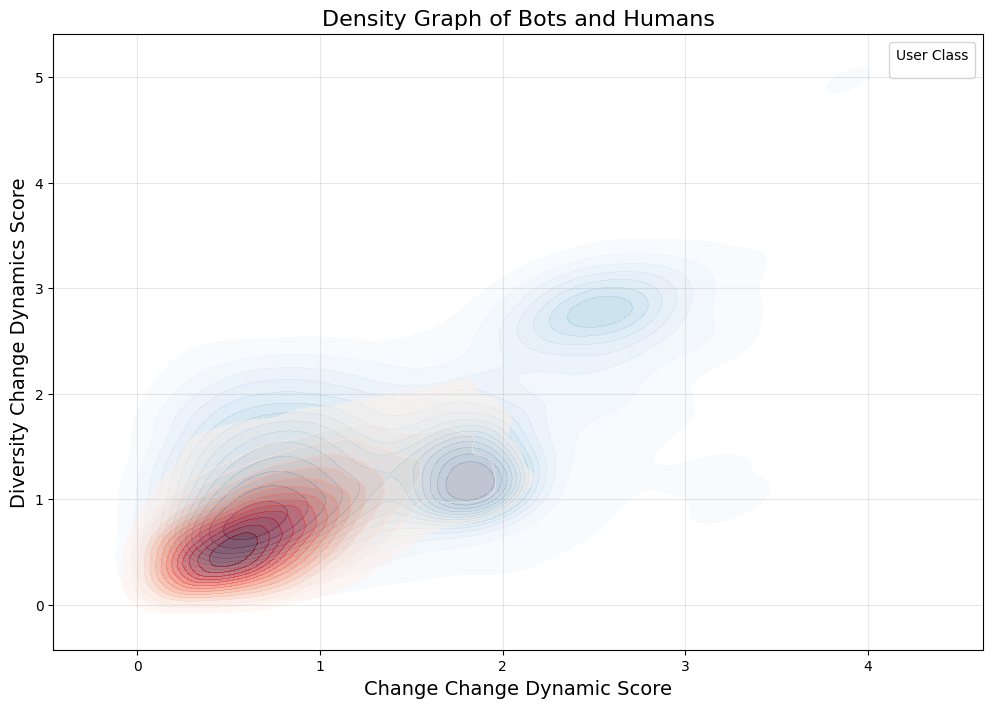

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Separate the data by class
bots = df_subset[df_subset['user_class'] == 'bot']
humans = df_subset[df_subset['user_class'] == 'human']

# Create the plot
plt.figure(figsize=(12, 8))

# Density plots with contour lines
sns.kdeplot(
    x=bots['change_change_dynamic_score'], 
    y=bots['diversity_change_dynamics_score'], 
    cmap="Blues", fill=True, alpha=0.5, label='Bots', levels=15
)
sns.kdeplot(
    x=humans['change_change_dynamic_score'], 
    y=humans['diversity_change_dynamics_score'], 
    cmap="Reds", fill=True, alpha=0.5, label='Humans', levels=15
)

# Add labels and legend
plt.title("Density Graph of Bots and Humans", fontsize=16)
plt.xlabel("Change Change Dynamic Score", fontsize=14)
plt.ylabel("Diversity Change Dynamics Score", fontsize=14)
plt.legend(title="User Class", fontsize=12)
plt.grid(alpha=0.3)

plt.show()

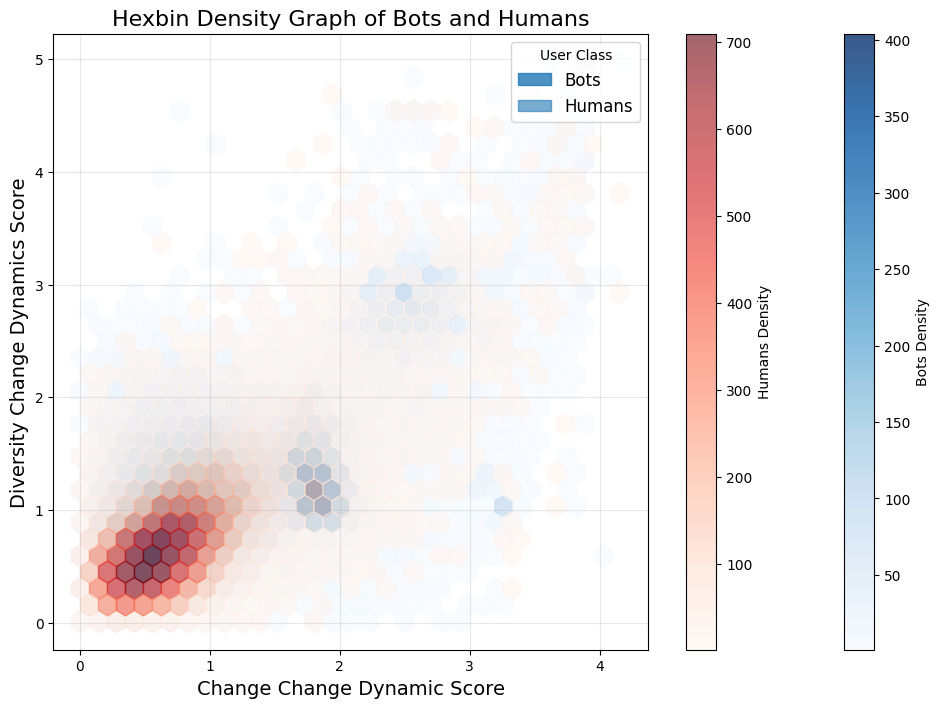

In [82]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 8))

# Hexbin plot for Bots
hb_bots = plt.hexbin(
    bots['change_change_dynamic_score'], 
    bots['diversity_change_dynamics_score'], 
    gridsize=30, cmap='Blues', mincnt=1, alpha=0.8, label='Bots'
)

# Hexbin plot for Humans
hb_humans = plt.hexbin(
    humans['change_change_dynamic_score'], 
    humans['diversity_change_dynamics_score'], 
    gridsize=30, cmap='Reds', mincnt=1, alpha=0.6, label='Humans'
)

# Add colorbars for each hexbin
cbar_bots = plt.colorbar(hb_bots, label='Bots Density')
cbar_humans = plt.colorbar(hb_humans, label='Humans Density')

# Add labels, title, and legend
plt.title("Hexbin Density Graph of Bots and Humans", fontsize=16)
plt.xlabel("Change Change Dynamic Score", fontsize=14)
plt.ylabel("Diversity Change Dynamics Score", fontsize=14)
plt.legend(title="User Class", fontsize=12, loc='upper right')
plt.grid(alpha=0.3)

plt.show()


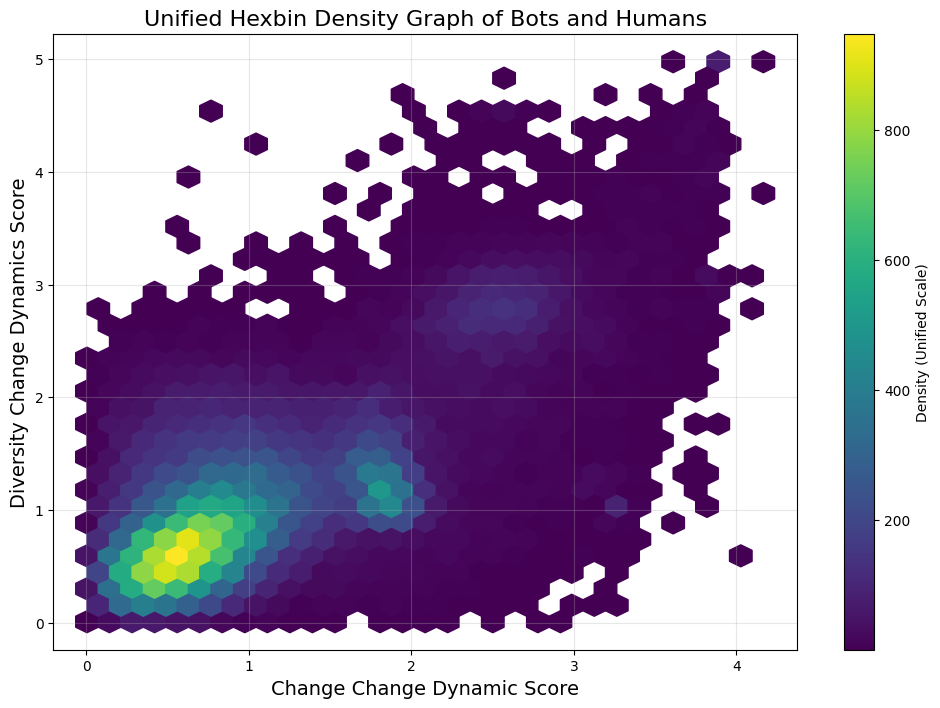

In [83]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 8))

# Combine the data for a unified scale
all_data = pd.concat([bots, humans])

# Hexbin plot with a unified scale
hb = plt.hexbin(
    all_data['change_change_dynamic_score'], 
    all_data['diversity_change_dynamics_score'], 
    gridsize=30, cmap='viridis', mincnt=1
)

# Add colorbar for the shared density scale
cbar = plt.colorbar(hb, label='Density (Unified Scale)')

# Add labels, title, and legend
plt.title("Unified Hexbin Density Graph of Bots and Humans", fontsize=16)
plt.xlabel("Change Change Dynamic Score", fontsize=14)
plt.ylabel("Diversity Change Dynamics Score", fontsize=14)
plt.grid(alpha=0.3)

plt.show()


Considering only ->  
"change_change_dynamic_score", "diversity_change_dynamics_score:


Model Evaluation Metrics:
Accuracy: 0.7198
Precision: 0.7220
Recall: 0.7198
F1 Score: 0.7190

Confusion Matrix:
[[5512 2757]
 [1901 6452]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.67      0.70      8269
           1       0.70      0.77      0.73      8353

    accuracy                           0.72     16622
   macro avg       0.72      0.72      0.72     16622
weighted avg       0.72      0.72      0.72     16622

 Feature  Coefficient  Odds Ratio  Importance
1  diversity_change_dynamics_score    -1.401726    0.246172    1.401726
0      change_change_dynamic_score    -0.645995    0.524141    0.645995

![alt text](image.png)


Considering all the features ->

Model Evaluation Metrics:
Accuracy: 0.8244
Precision: 0.8250
Recall: 0.8244
F1 Score: 0.8243

Confusion Matrix:
[[6630 1639]
 [1279 7074]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      8269
           1       0.81      0.85      0.83      8353

    accuracy                           0.82     16622
   macro avg       0.83      0.82      0.82     16622
weighted avg       0.83      0.82      0.82     16622

![alt text](image-1.png)

                                    Feature  Coefficient  Odds Ratio  \
8              standard_deviation_of_action    -7.591325    0.000505   
9                          diversity_action    -7.309246    0.000669   
10              diversity_content_syntactic    -6.467376    0.001553   
4        lowest_change_in_content_syntactic    -5.635356    0.003569   
1                             change_action     4.677630  107.515005   
0                  change_content_syntactic     4.659890  105.624419   
7                   lowest_change_in_action    -4.075769    0.016979   
5   standard_deviation_of_content_syntactic     2.649884   14.152395   
6                  highest_change_in_action     0.905752    2.473793   
11          diversity_change_dynamics_score    -0.709929    0.491679   
2               change_change_dynamic_score    -0.698886    0.497139   
3       highest_change_in_content_syntactic    -0.147405    0.862944   

    Importance  
8     7.591325  
9     7.309246  
10    6.467376  
4     5.635356  
1     4.677630  
0     4.659890  
7     4.075769  
5     2.649884  
6     0.905752  
11    0.709929  
2     0.698886  
3     0.147405  